In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('../data/am_pm.csv')
df.head()

,date,target,am,pm,predict
0,2020-04-17,working_day,21,2,weekend
1,2020-04-18,weekend,1,68,working_day
2,2020-04-19,weekend,18,15,working_day
3,2020-04-20,working_day,2,23,working_day
4,2020-04-21,working_day,0,25,working_day


In [3]:
X = df[['am','pm']].values
y = df['target'].values
clf = LogisticRegression(random_state=21, fit_intercept=False).fit(X, y)

In [5]:
x_line = np.array([min(df['am']), max(df['am'])])
y_line = (-clf.coef_[0][0] / clf.coef_[0][1]) * x_line

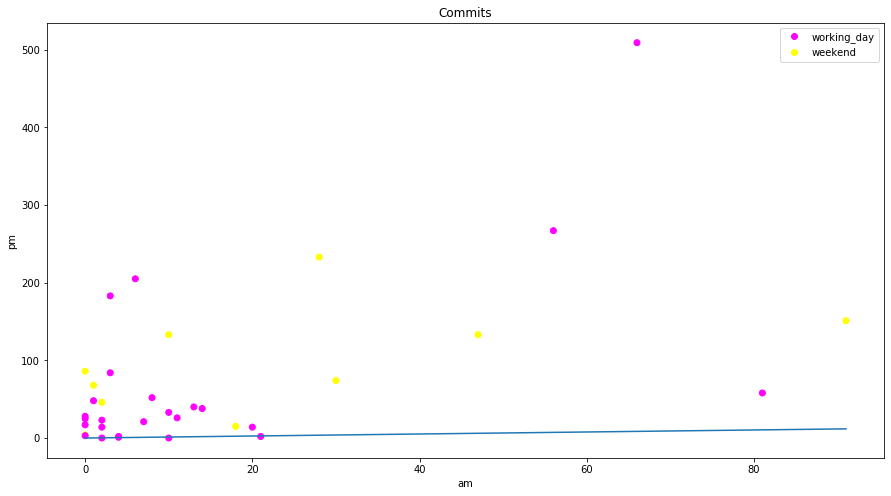

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(x = df['am'], y=df['pm'], cmap='spring', 
                      c=[0 if i == 'working_day' else 1 for i in df.target])

handles, labels = scatter.legend_elements(prop='colors')
ax.plot(x_line, y_line, label='boundary')
ax.legend(handles, ['working_day', 'weekend'])
ax.set_title('Commits')
ax.set_xlabel('am')
ax.set_ylabel('pm')
plt.show()

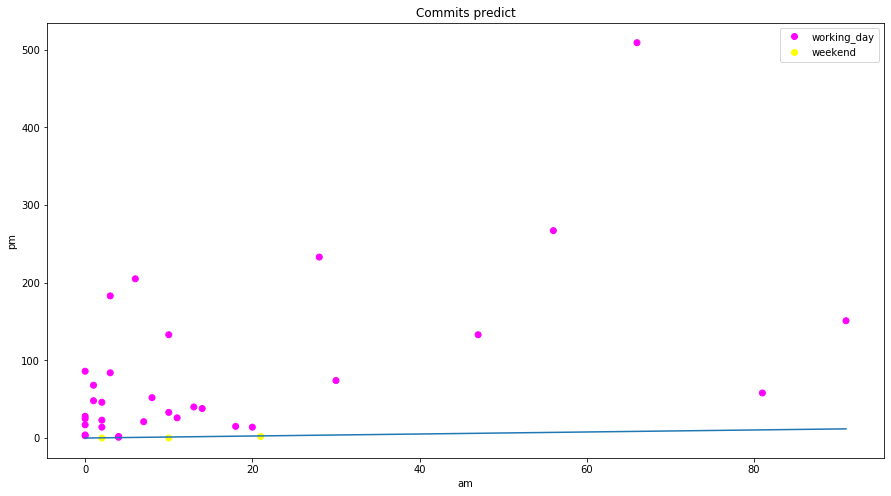

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(x = df['am'], y=df['pm'], cmap='spring', 
                      c=[0 if i == 'working_day' else 1 for i in df.predict])

handles, labels = scatter.legend_elements(prop='colors')
ax.plot(x_line, y_line, label='boundary')
ax.legend(handles, ['working_day', 'weekend'])
ax.set_title('Commits predict')
ax.set_xlabel('am')
ax.set_ylabel('pm')
plt.show()

In [8]:
scaler = StandardScaler()
df[['am', 'pm']] = scaler.fit_transform(X)
df.head()

,date,target,am,pm,predict
0,2020-04-17,working_day,0.200690,-0.719904,weekend
1,2020-04-18,weekend,-0.655914,-0.071822,working_day
2,2020-04-19,weekend,0.072199,-0.592251,working_day
3,2020-04-20,working_day,-0.613084,-0.513696,working_day
4,2020-04-21,working_day,-0.698744,-0.494057,working_day


In [9]:
X = df[['am','pm']].values
y = df['target'].values
clf = LogisticRegression(random_state=21, fit_intercept=False).fit(X, y)

In [11]:
df['predict'] = clf.predict(X)

In [13]:
df.head()

,date,target,am,pm,predict
0,2020-04-17,working_day,0.200690,-0.719904,working_day
1,2020-04-18,weekend,-0.655914,-0.071822,working_day
2,2020-04-19,weekend,0.072199,-0.592251,working_day
3,2020-04-20,working_day,-0.613084,-0.513696,working_day
4,2020-04-21,working_day,-0.698744,-0.494057,working_day


In [17]:
accuracy_score(df['target'], df['predict'])

0.7428571428571429

In [18]:
x_line = np.array([min(df['am']), max(df['am'])])
y_line = (-clf.coef_[0][0] / clf.coef_[0][1]) * x_line

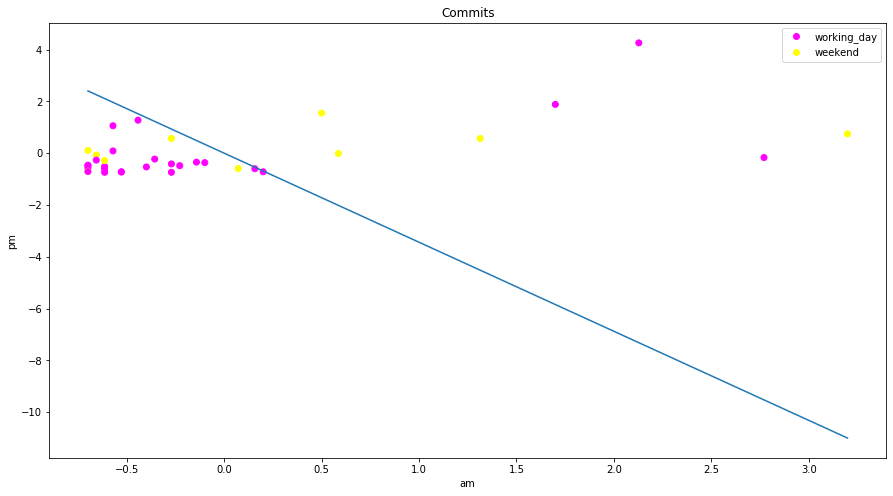

In [21]:
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(x = df['am'], y=df['pm'], cmap='spring', 
                      c=[0 if i == 'working_day' else 1 for i in df.target])

handles, labels = scatter.legend_elements(prop='colors')
ax.plot(x_line, y_line, label='boundary')
ax.legend(handles, ['working_day', 'weekend'])
ax.set_title('Commits')
ax.set_xlabel('am')
ax.set_ylabel('pm')
plt.show()

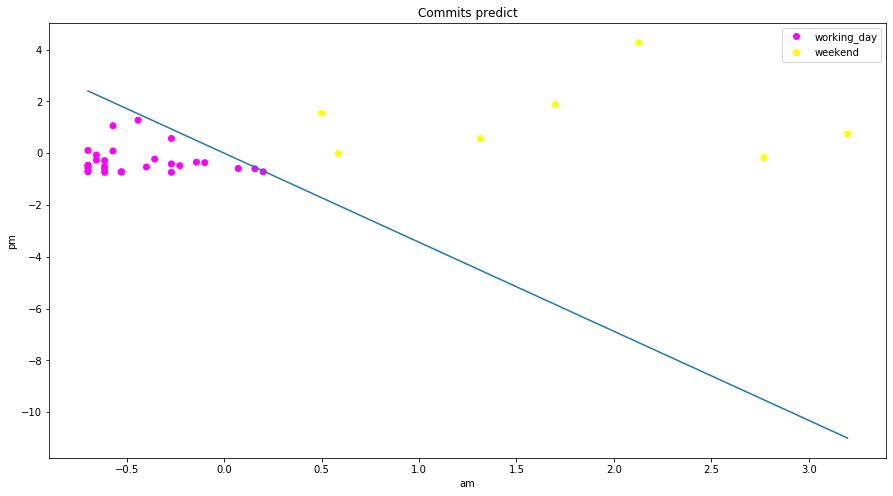

In [19]:
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(x = df['am'], y=df['pm'], cmap='spring', 
                      c=[0 if i == 'working_day' else 1 for i in df.predict])

handles, labels = scatter.legend_elements(prop='colors')
ax.plot(x_line, y_line, label='boundary')
ax.legend(handles, ['working_day', 'weekend'])
ax.set_title('Commits predict')
ax.set_xlabel('am')
ax.set_ylabel('pm')
plt.show()

In [26]:
svc = SVC(probability=True, random_state=21).fit(X, y)
y_predict = svc.predict(X)
accuracy_score(y, y_predict)

0.7428571428571429

In [38]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid')}
svc = SVC(probability=True, random_state=21)
cv = GridSearchCV(svc, parameters, scoring='accuracy').fit(X,y)
cv.best_params_

{'kernel': 'poly'}

In [39]:
y_predict = cv.predict(X)
accuracy_score(y, y_predict)

0.7428571428571429